# 🌠 Stellar Classification - SDSS17

![SegmentLocal](./Assets/giphy.gif "segment")

## 🚀 Introduction

In astronomy today we have the challenge of classifying data, as new data is observed all the time.

In this projecet we will build a model that will classify stars beased on their spectra. Using a dataset from the Sloan Digital Sky Survey (SDSS), the kinda of stars we will be classifying are:

- Stars
- Galaxies
- Quasars

The dataset contains 100,000 observations of space taken by the SDSS. Each observation has 17 features columns and 1 class whic identifies it to be either a star, galaxy or quasar.

1. obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
2. alpha = Right Ascension angle (at J2000 epoch)
3. delta = Declination angle (at J2000 epoch)
4. u = Ultraviolet filter in the photometric system
5. g = Green filter in the photometric system
6. r = Red filter in the photometric system
7. i = Near Infrared filter in the photometric system
8. z = Infrared filter in the photometric system
9. run_ID = Run Number used to identify the specific scan
10. rereun_ID = Rerun Number to specify how the image was processed
11. cam_col = Camera column to identify the scanline within the run
12. field_ID = Field number to identify each field
13. spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
14. class = object class (galaxy, star or quasar object)
15. redshift = redshift value based on the increase in wavelength
16. plate = plate ID, identifies each plate in SDSS
17. MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
18. fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

## 📓 About Notebook

This notebook contains the study case to apply the knowledge acquired in the course of Machine Learning for Data Science.

The project will compare the classicals machine learning algorithms with the deep learning algorithms.

- KNN (K-Nearest Neighbors)
- Deep Learning (Neural Networks)

## Indexs

1. [Importing Libraries](#Importing-Libraries)
2. [Importing Dataset](#Importing-Dataset)
3. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
4. [Feature Selection](#Feature-Selection)
5. [Data Preprocessing](#Data-Preprocessing)
6. [Models](#Models)
    - [KNN](#KNN)
    - [Deep Learning](#Deep-Learning)
7. [Conclusion](#Conclusion)
8. [References](#References)

## Importing Libraries

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Tuple

import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

## Importing Dataset

In [116]:
df = pd.read_csv('./Input/stellar-classification-dataset-sdss17/star_classification.csv')

In [59]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


## Exploratory Data Analysis

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [48]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [49]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

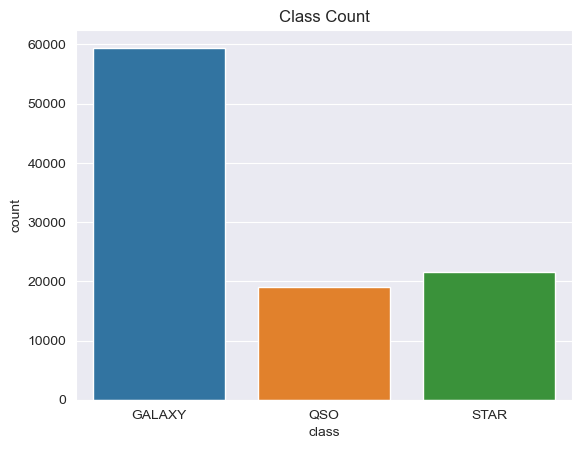

In [50]:
sns.countplot(x='class', data=df)
plt.title('Class Count')
plt.show()

### Explorting Features

In [51]:
def plot_feature(feature):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[df['class'] == 'STAR'][feature], label='Star')
    sns.kdeplot(df[df['class'] == 'GALAXY'][feature], label='Galaxy')
    sns.kdeplot(df[df['class'] == 'QSO'][feature], label='QSO')
    sns.kdeplot(df[feature], label='Total')
    plt.title(f'{feature} Distribution')
    plt.legend()
    plt.show()

In [9]:
def log_plot_feature(feature):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(np.log(df[df['class'] == 'STAR'][feature]), label='Star')
    sns.kdeplot(np.log(df[df['class'] == 'GALAXY'][feature]), label='Galaxy')
    sns.kdeplot(np.log(df[df['class'] == 'QSO'][feature]), label='QSO')
    sns.kdeplot(np.log(df[feature]), label='Total')
    plt.title(f'{feature} Distribution')
    plt.legend()
    plt.show()

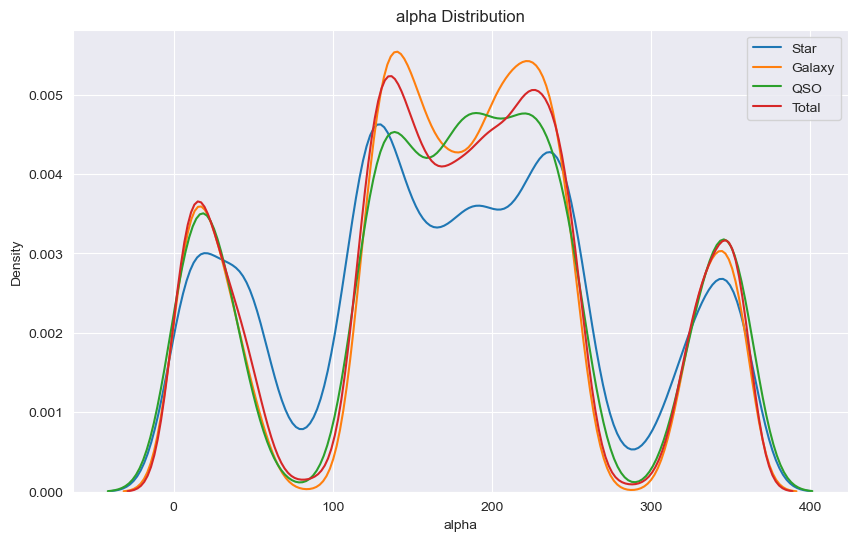

In [10]:
plot_feature('alpha')

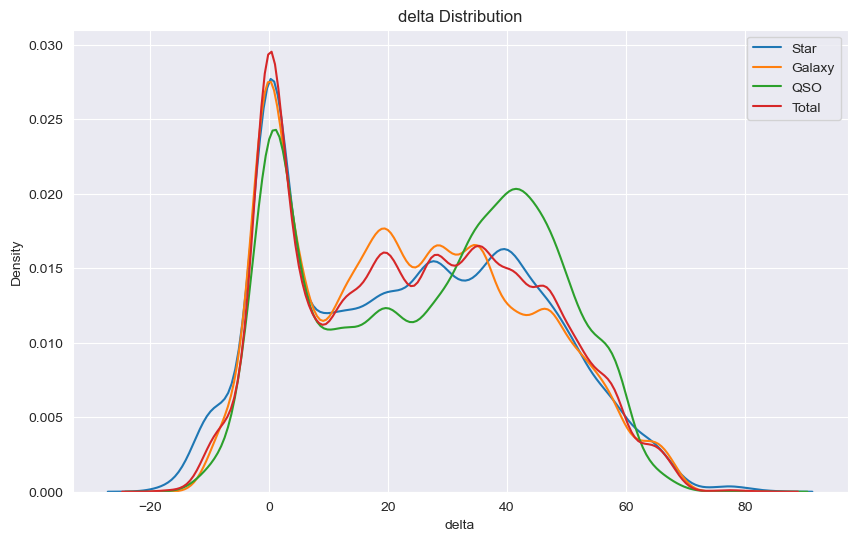

In [11]:
plot_feature('delta')

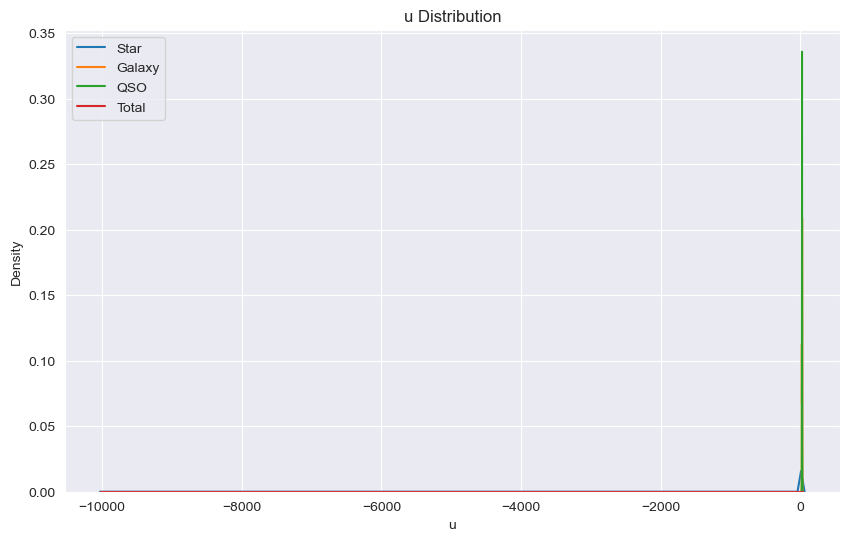

In [12]:
plot_feature('u')

C:\Users\vitor_alves\AppData\Local\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vitor_alves\AppData\Local\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


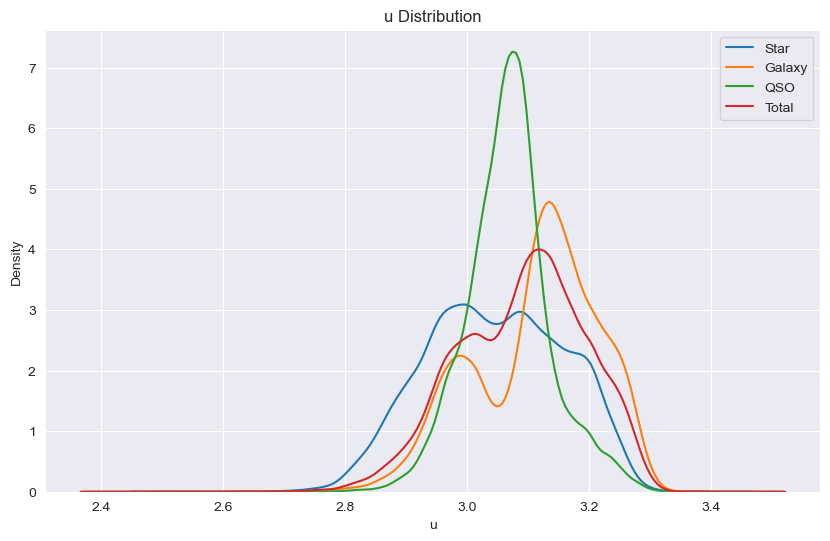

In [13]:
log_plot_feature('u')

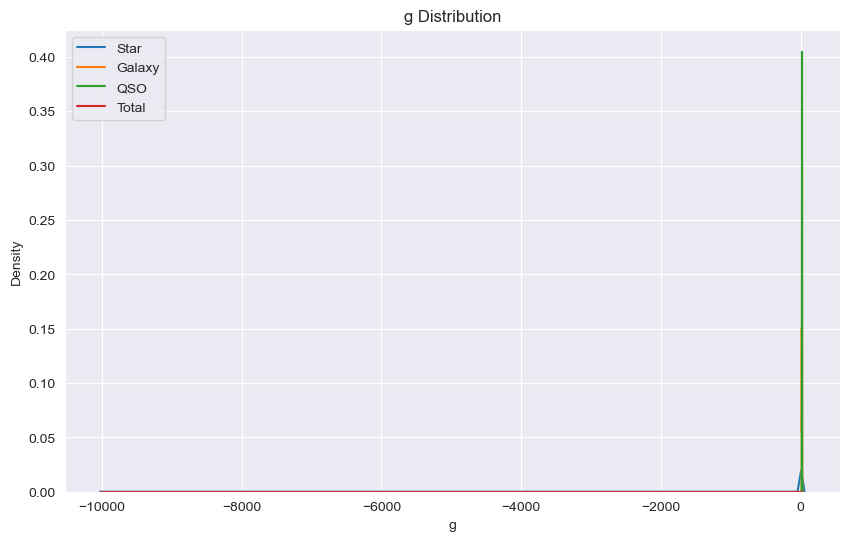

In [14]:
plot_feature('g')

C:\Users\vitor_alves\AppData\Local\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vitor_alves\AppData\Local\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


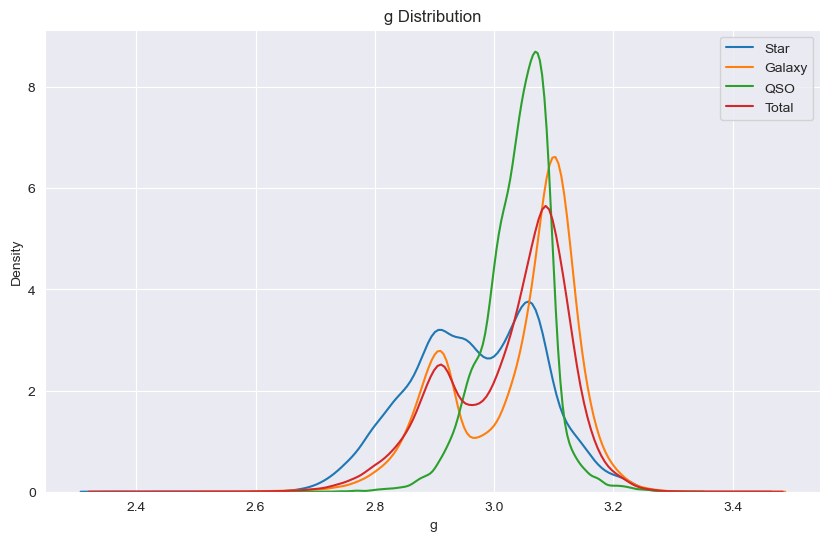

In [15]:
log_plot_feature('g')

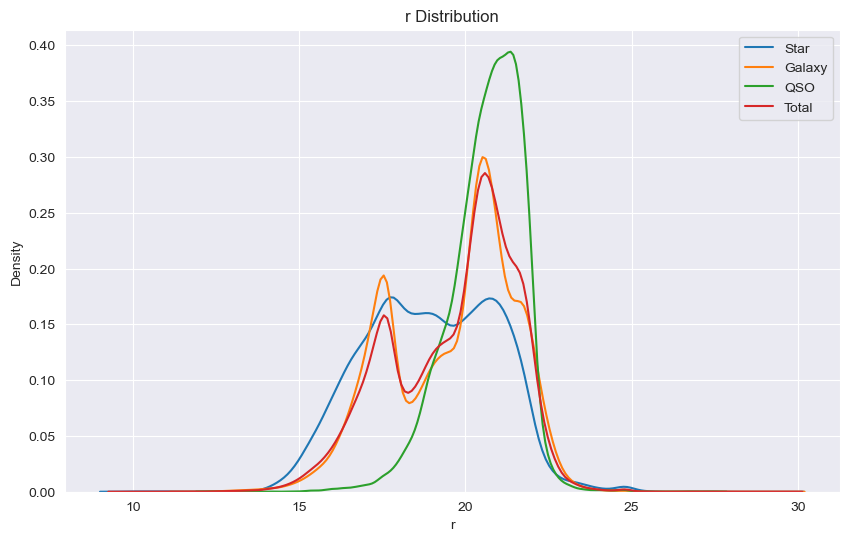

In [16]:
plot_feature('r')

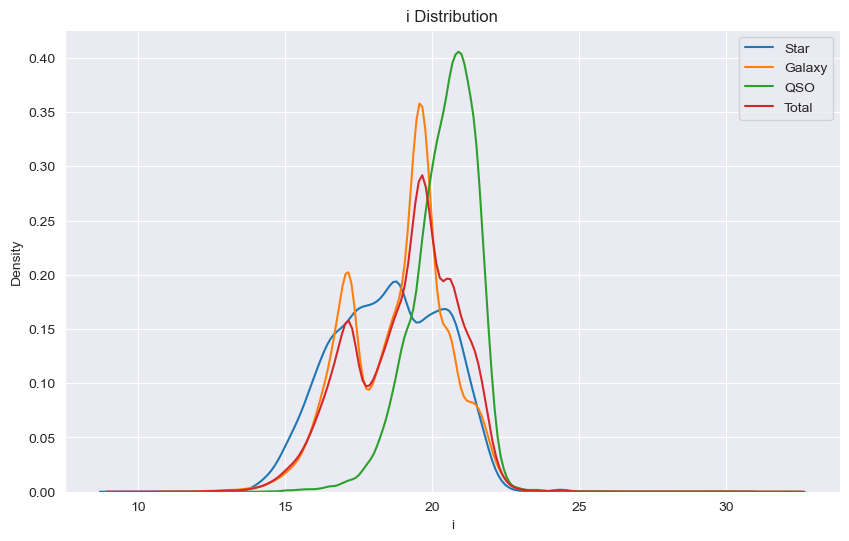

In [17]:
plot_feature('i')

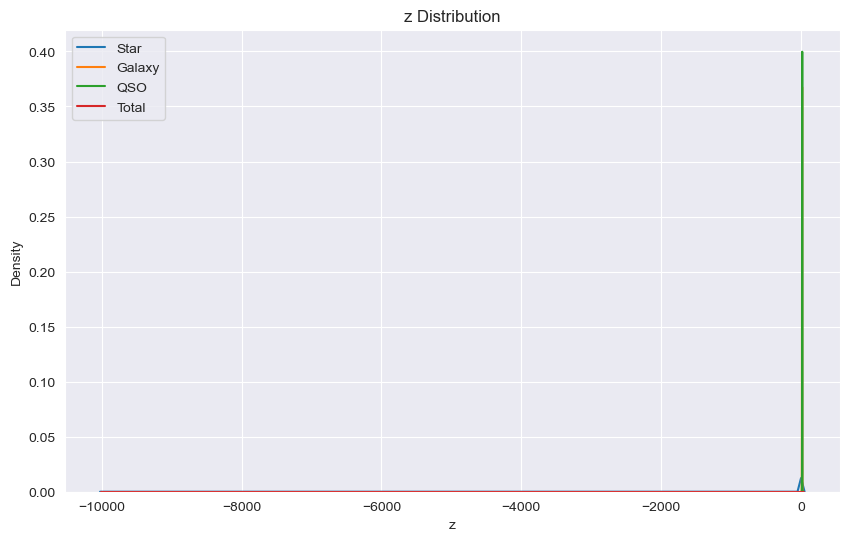

In [18]:
plot_feature('z')

C:\Users\vitor_alves\AppData\Local\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vitor_alves\AppData\Local\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


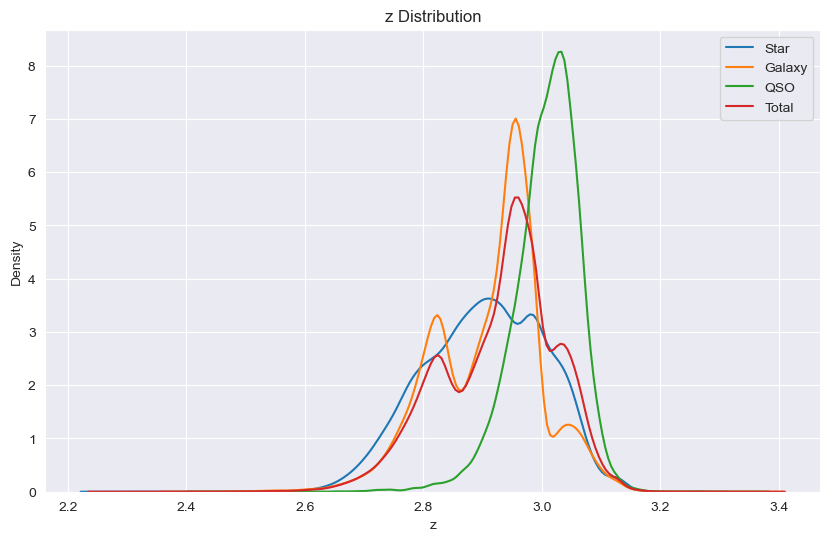

In [19]:
log_plot_feature('z')

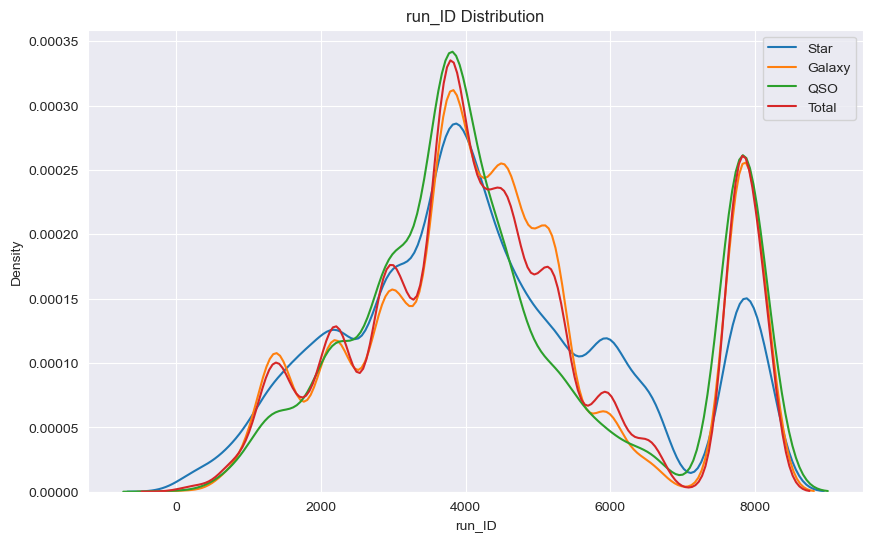

In [20]:
plot_feature('run_ID')

In [21]:
df['rerun_ID'].value_counts()

301    100000
Name: rerun_ID, dtype: int64

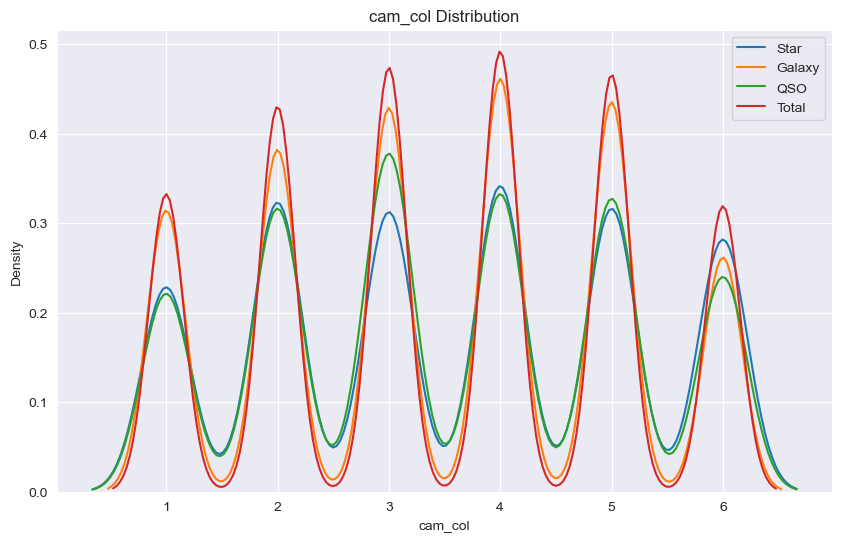

In [22]:
plot_feature('cam_col')

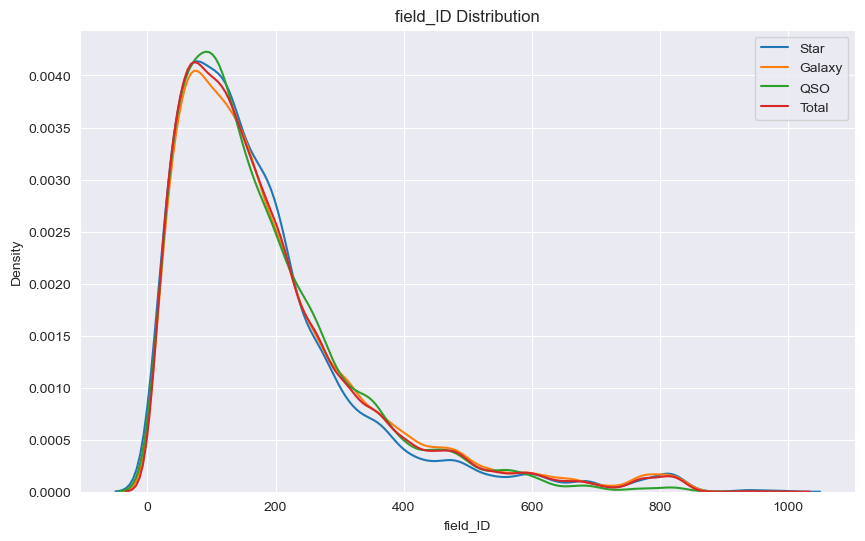

In [23]:
plot_feature('field_ID')

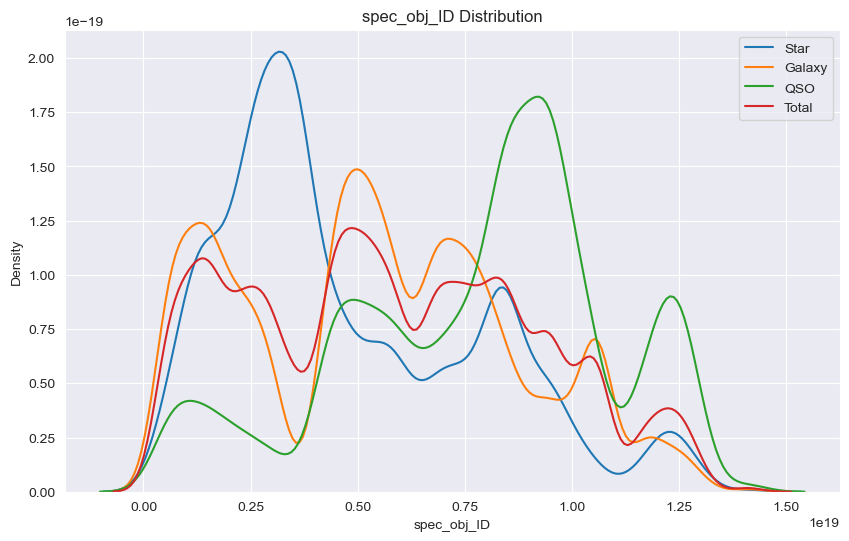

In [24]:
plot_feature('spec_obj_ID')

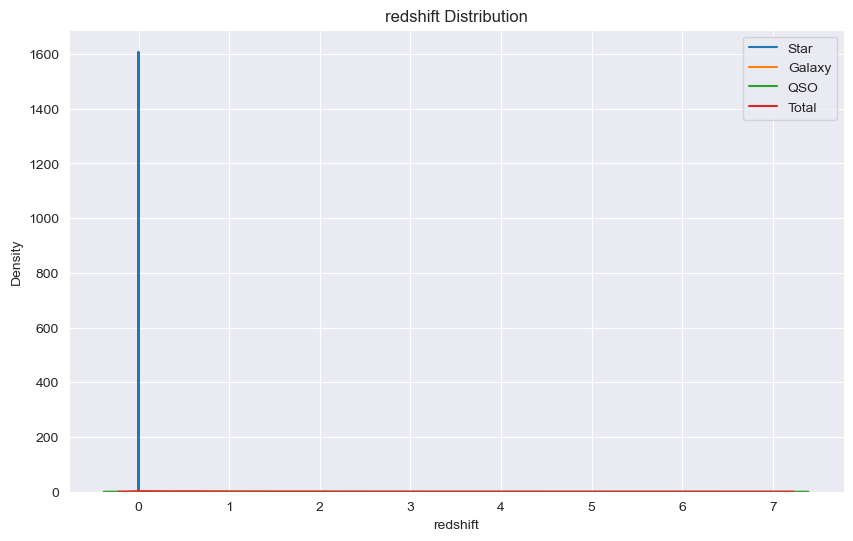

In [25]:
plot_feature('redshift')

C:\Users\vitor_alves\AppData\Local\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vitor_alves\AppData\Local\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vitor_alves\AppData\Local\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vitor_alves\AppData\Local\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vitor_alves\AppData\Local\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


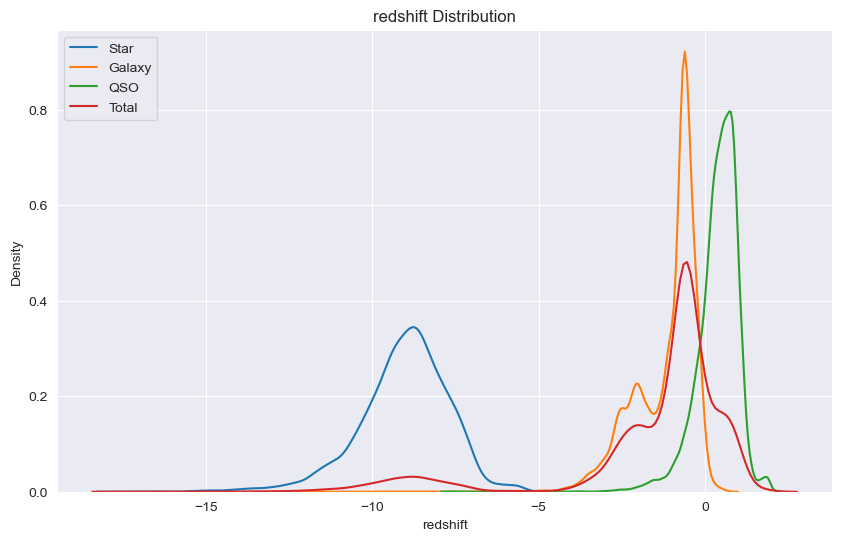

In [26]:
log_plot_feature('redshift')

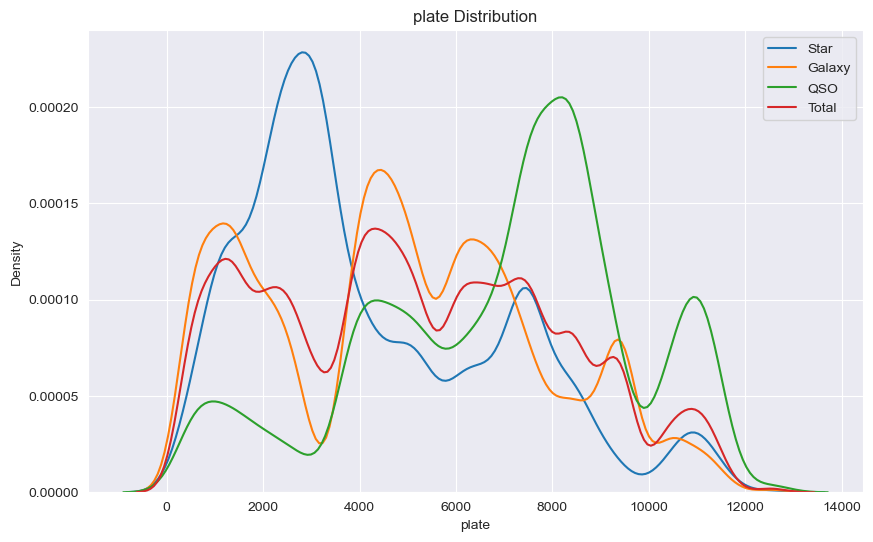

In [27]:
plot_feature('plate')

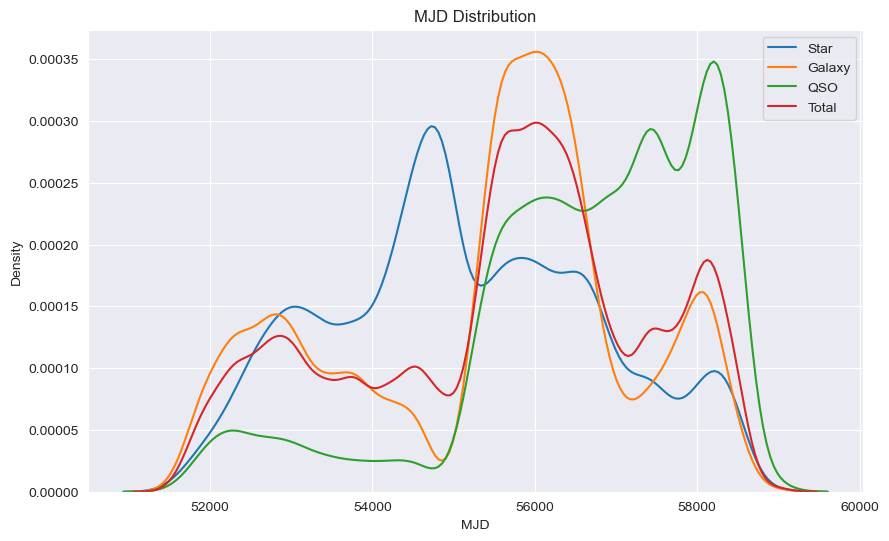

In [28]:
plot_feature('MJD')

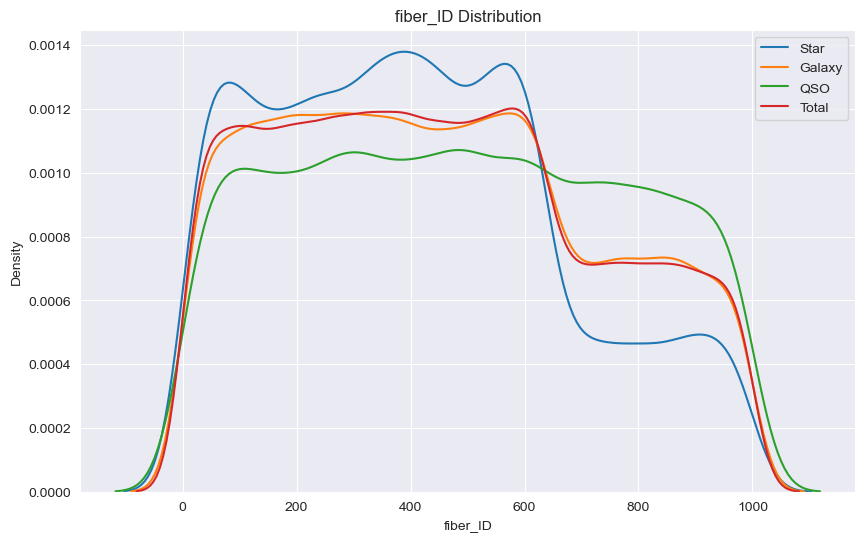

In [29]:
plot_feature('fiber_ID')

### Correlation Matrix

Compare the correlation between the features and the class.

Using the Pearson correlation coefficient.

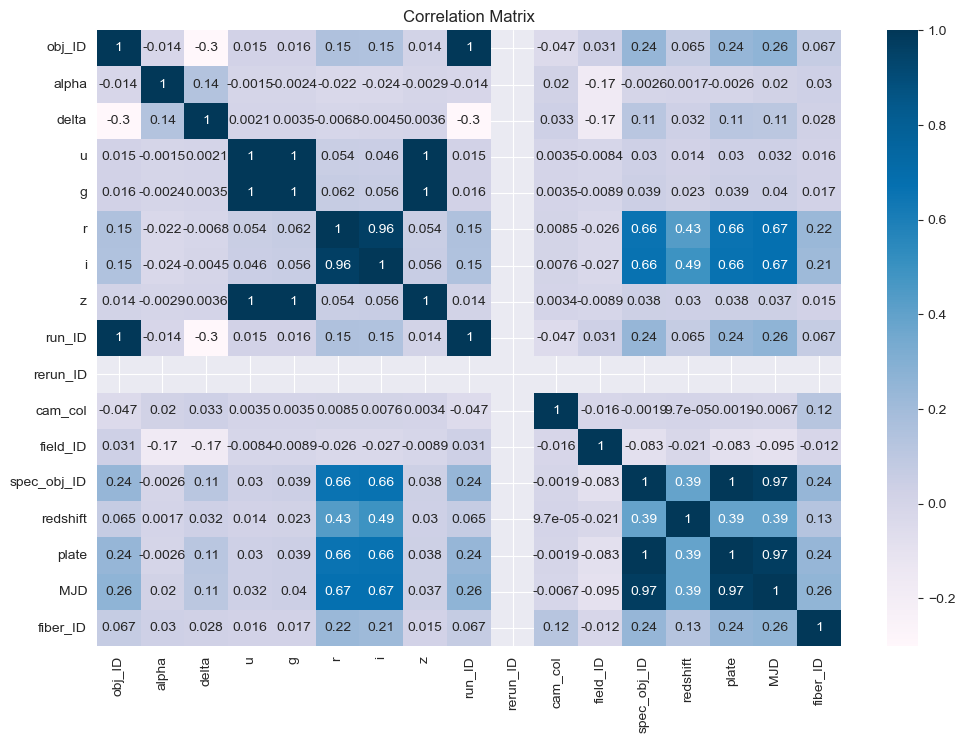

In [63]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='PuBu')
plt.title('Correlation Matrix')
plt.show()

Using the Spearman correlation coefficient.

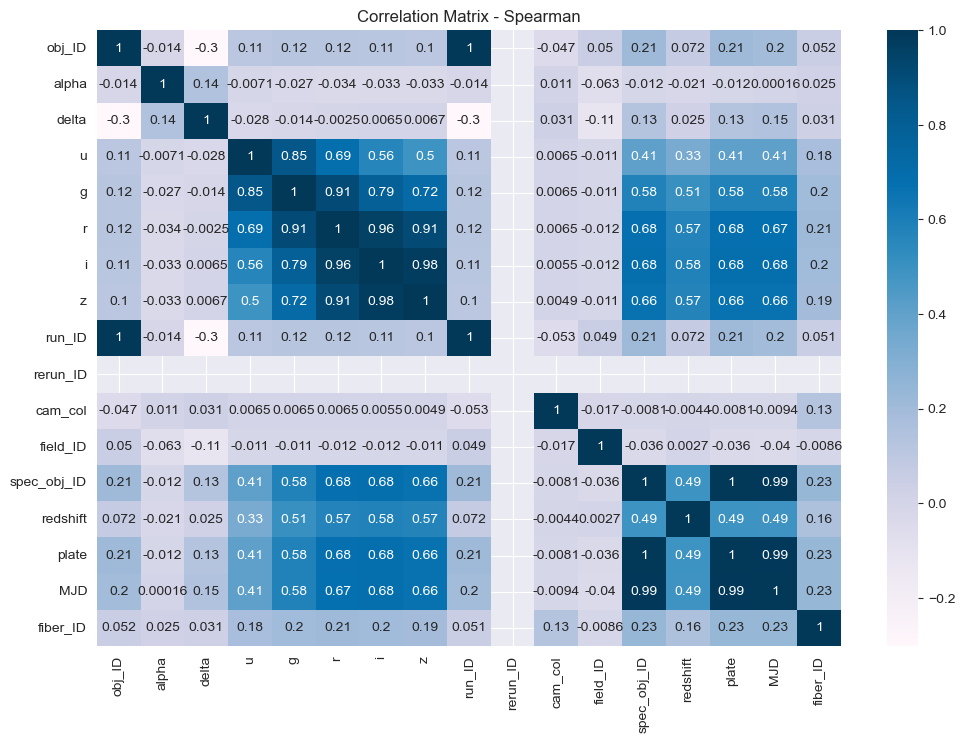

In [65]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr('spearman', numeric_only=True), annot=True, cmap='PuBu')
plt.title('Correlation Matrix - Spearman')
plt.show()

## Feature Selection

### Droping Features

In [117]:
df.drop(['obj_ID', 'rerun_ID', 'run_ID', 'field_ID', 'MJD', 'plate', 'fiber_ID'], axis=1, inplace=True)

In [118]:
df.head()

,alpha,delta,u,g,r,i,z,cam_col,spec_obj_ID,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,6.543777e+18,GALAXY,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,1.176014e+19,GALAXY,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,5.152200e+18,GALAXY,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,1.030107e+19,GALAXY,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,6.891865e+18,GALAXY,0.116123


## Preprocessing

### Encoding Class

In [119]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

df.head()

,alpha,delta,u,g,r,i,z,cam_col,spec_obj_ID,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,6.543777e+18,0,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,1.176014e+19,0,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,5.152200e+18,0,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,1.030107e+19,0,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,6.891865e+18,0,0.116123


In [120]:
df['class'].value_counts()

0    59445
2    21594
1    18961
Name: class, dtype: int64

#### Spliting Dataset

Splint dataset between train and test with 70% and 30% respectively.

In [121]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.3, random_state=42, stratify=df['class'])

Splint dataset between train and validation with 80% and 20% respectively.

In [122]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

### Scaling Features

In [123]:
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
X_val_sc = scaler.transform(X_val)

In [124]:
X_train_sc

array([[ 0.70172491,  1.39864259,  0.08073608, ...,  0.93297305,
         0.39799254, -0.30002377],
       [-0.52889223,  0.32750515, -0.05932825, ..., -1.58711622,
        -0.66166928, -0.78839011],
       [ 0.31303016,  1.09977275, -0.03654893, ...,  0.93297305,
        -1.24593257, -0.56699261],
       ...,
       [ 1.85695712, -0.97996582,  0.05546065, ..., -0.32707159,
        -0.24867938, -0.03298644],
       [-0.5073443 ,  0.91161452,  0.07623506, ...,  1.56299537,
        -0.45140457, -0.78950219],
       [ 1.77016005, -1.32253688,  0.05423512, ...,  0.93297305,
        -0.26388062, -0.0605848 ]])

## Models

### KNN

In [125]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_sc, y_train)

y_pred = knn.predict(X_test_sc)

print(classification_report(y_test, y_pred, target_names=['Galaxy', 'QSO', 'Star']))

              precision    recall  f1-score   support

      Galaxy       0.92      0.96      0.94     17834
        Star       0.96      0.87      0.91      5688
         QSO       0.91      0.89      0.90      6478

    accuracy                           0.93     30000
   macro avg       0.93      0.91      0.92     30000
weighted avg       0.93      0.93      0.93     30000



In [126]:
print(confusion_matrix(y_test, y_pred))

[[17133   196   505]
 [  713  4941    34]
 [  728     5  5745]]


### Decision Tree

In [130]:
features = df.drop('class', axis=1).columns

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### Feature Importance

In [131]:
def plot_feature_importance(model, features):
    plt.figure(figsize=(12, 8))
    sns.barplot(x=model.feature_importances_, y=features)
    plt.title('Feature Importance')
    plt.show()

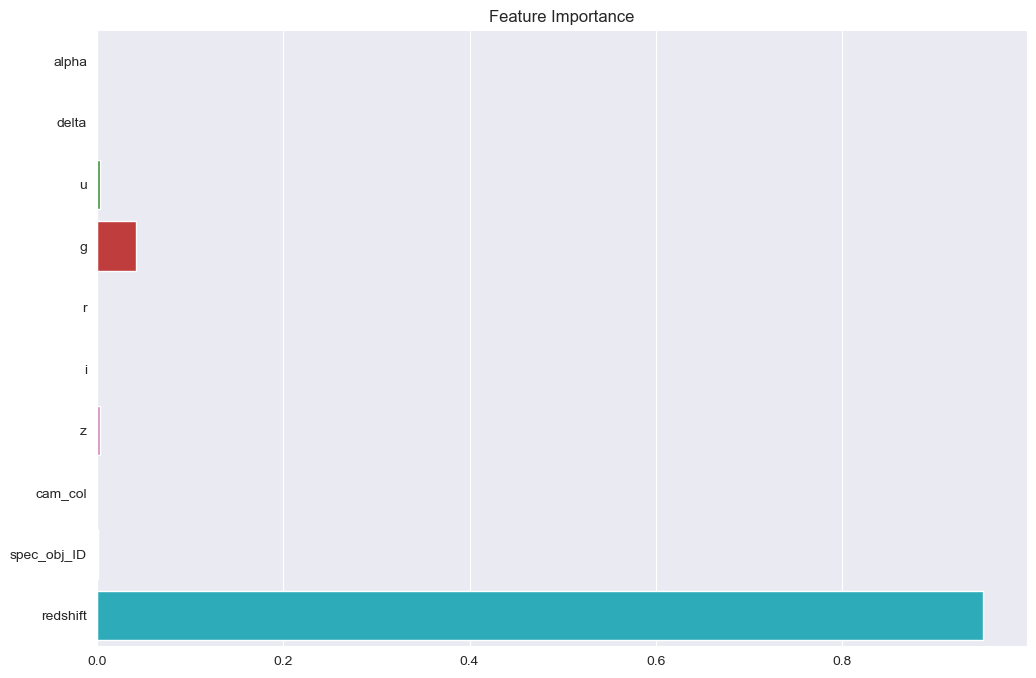

In [132]:
plot_feature_importance(model, features)

In [135]:
print(classification_report(y_test, y_pred, target_names=['Galaxy', 'Star', 'QSO']))

              precision    recall  f1-score   support

      Galaxy       0.96      0.98      0.97     17834
        Star       0.95      0.86      0.91      5688
         QSO       1.00      1.00      1.00      6478

    accuracy                           0.96     30000
   macro avg       0.97      0.95      0.96     30000
weighted avg       0.96      0.96      0.96     30000



In [134]:
print(confusion_matrix(y_test, y_pred))

[[17558   254    22]
 [  776  4911     1]
 [    4     0  6474]]
